# Phase 2 Final Notebook

##### Rachael McCue - Dietrich Nigh - Jake Swecker


## Import necessary libraries

In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
plt.style.use('seaborn-notebook')

## Initial Data Exploration

In [2]:
#Reading in the Data and Exploring the head/info

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
#Find null values

(df.isna().sum().sort_values(ascending=False))/len(df)

heat_source      0.001061
sewer_system     0.000464
long             0.000000
nuisance         0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
condition        0.000000
view             0.000000
lat              0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
id               0.000000
dtype: float64

In [5]:
df['grade'].value_counts().sort_index()

1 Cabin              2
10 Very Good      1371
11 Excellent       406
12 Luxury          122
13 Mansion          24
2 Substandard        2
3 Poor              13
4 Low               51
5 Fair             393
6 Low Average     2858
7 Average        11697
8 Good            9410
9 Better          3806
Name: grade, dtype: int64

In [6]:
df['sqft_living'].describe()

count    30155.000000
mean      2112.424739
std        974.044318
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2619.500000
max      15360.000000
Name: sqft_living, dtype: float64

Get zipcode into its own column by splitting it from address column.
Followed by a loop that only keeps the the zipcodes that have a frequency of at least 100 homes in them.

In [7]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

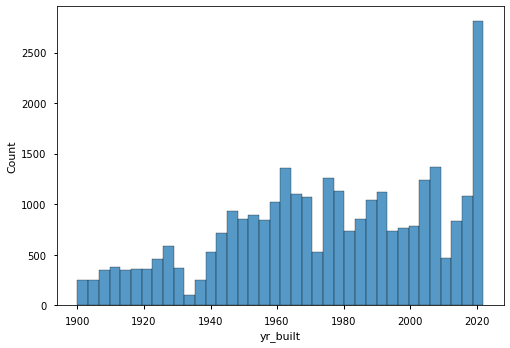

In [8]:
sns.histplot(df['yr_built'])

In [9]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

Creating columns for Price per square foot for living space, and lot space.

## Data Cleaning and Engineering

Price per square foot columns for Lot and Living.

In [10]:
df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)

In [11]:
df['ppsq_living'].mean()

561.5095244569723

In [12]:
df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft

In [13]:
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips

seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98154, 98164, 98174, 98195, 98199]
df = df[df['zipcode'].isin(seattle) == True]

In [14]:
df['zipcode'].value_counts(ascending=False).head(20)

98103    761
98115    761
98117    748
98133    664
98118    601
98106    544
98125    489
98107    458
98126    441
98122    440
98144    439
98199    410
98116    388
98105    330
98112    307
98108    305
98136    299
98119    241
98102    144
98109    129
Name: zipcode, dtype: int64

In [15]:
pricelot_zipcode = df.groupby('zipcode').mean()['ppsq_lot'].sort_values(ascending=False)

<AxesSubplot:xlabel='zipcode'>

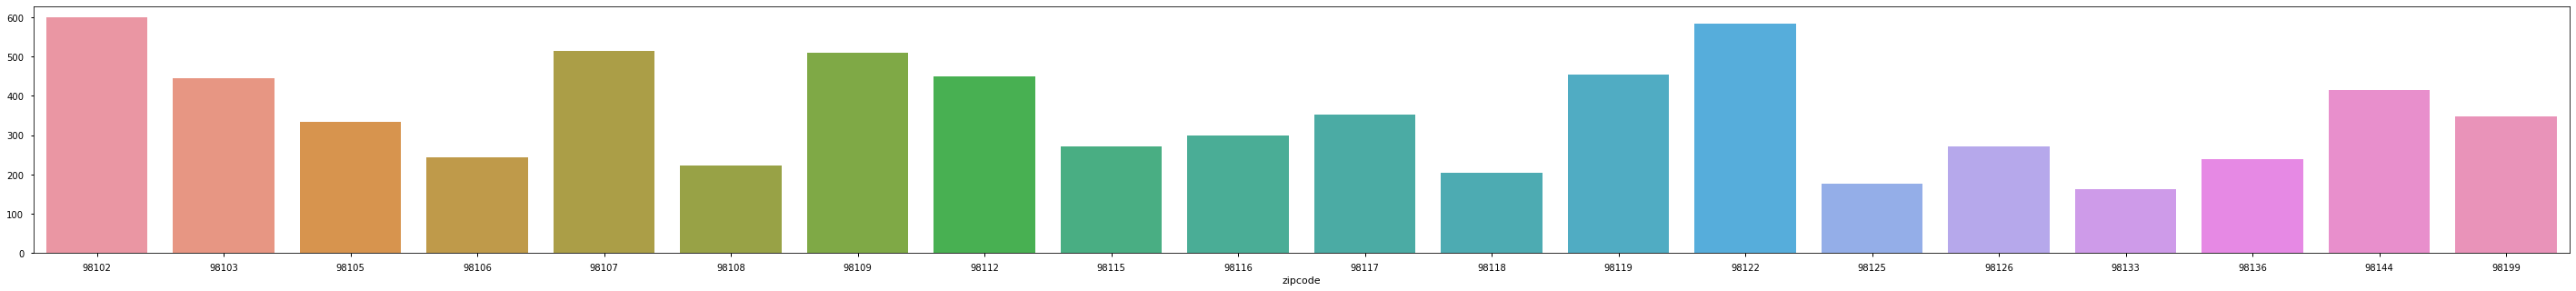

In [16]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=pricelot_zipcode.index, y=pricelot_zipcode.values)

<AxesSubplot:>

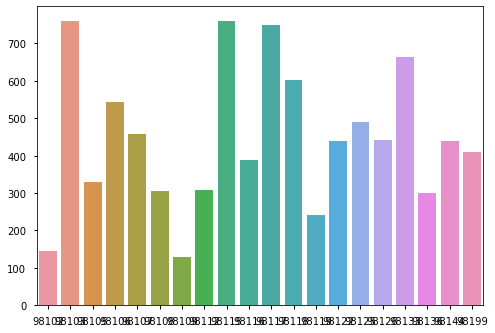

In [17]:
sns.barplot(x = df['zipcode'].value_counts().index, y=df['zipcode'].value_counts().values)

Drop tiny homes from the dataset. In Washington, the tiny home sqaure footage is 400sq ft. 

In [18]:
df = df[df['sqft_living'] > 400]

Turn Columns into numeric values. 
Binary values become 1 if present, 0 if not present

In [19]:
for x in df[['waterfront', 'greenbelt', 'nuisance']]: # converting YES and NO to 1 and 0
    df[x] = df[x].replace("NO", 0).replace("YES", 1)

In [20]:
df[['waterfront', 'greenbelt', 'nuisance']].sum()/len(df)

waterfront    0.006976
greenbelt     0.000450
nuisance      0.257876
dtype: float64

Create new columns for Basement, Patio, and Garage presence. 1 if present (sqaure feet over 0), 0 if not.

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

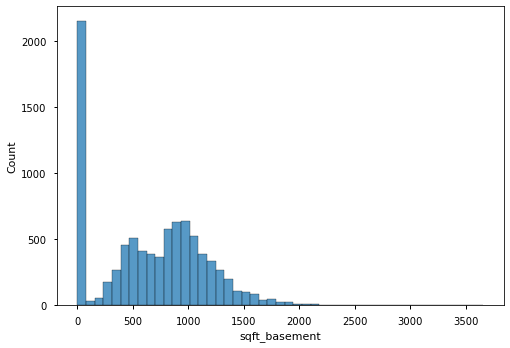

In [21]:
sns.histplot(df['sqft_basement'])

In [22]:
# Checking our work!
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      1
sewer_system     4
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
ppsq_living      0
ppsq_lot         0
zipcode          0
dtype: int64

In [23]:
df.reset_index(inplace=True)

In [24]:
basement_no_basement = []
for item in df['sqft_basement']:
    if item > 0:
        basement_no_basement.append(1)
    else:
        basement_no_basement.append(0)
df['basement'] = pd.DataFrame(basement_no_basement)

In [25]:
patio_no_patio = []
for item in df['sqft_patio']:
    if item > 0:
        patio_no_patio.append(1)
    else:
        patio_no_patio.append(0)
df['patio'] = pd.DataFrame(patio_no_patio)

In [26]:
garage_no_garage = []
for item in df['sqft_garage']:
    if item > 0:
        garage_no_garage.append(1)
    else:
        garage_no_garage.append(0)
df['garage'] = pd.DataFrame(garage_no_garage)

Drop Address, Latitude, Longitude, and Condition

In [27]:
df.drop(['address', 'lat', 'long', 'condition'], axis=1, inplace=True)

Finding the IQR for Price, ruling out outliers by multiplying IQR by 1.5

In [28]:
iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25)
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')

anything above 2047750.0 and below -70250.0 is an outlier


In [29]:
#filtering out the outliers based on the above cell
df = df[df['price'] < upper_lim_price]

C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

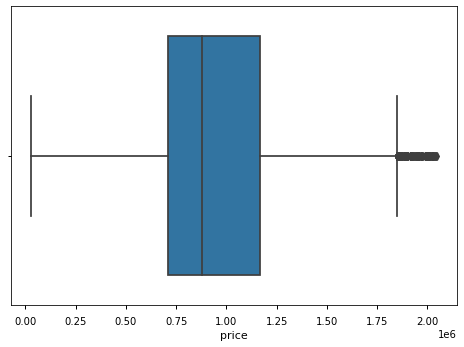

In [30]:
sns.boxplot(df['price'])

In [31]:
df['price'].describe()

count    8.318000e+03
mean     9.601726e+05
std      3.599887e+05
min      2.756300e+04
25%      7.100000e+05
50%      8.800000e+05
75%      1.165069e+06
max      2.047000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

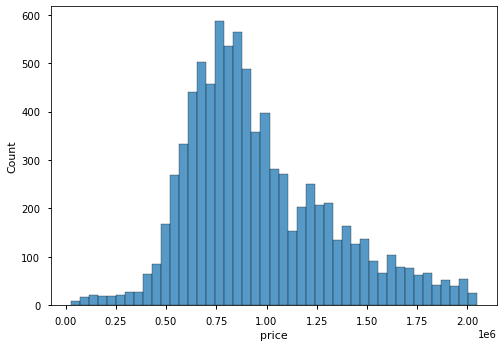

In [32]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

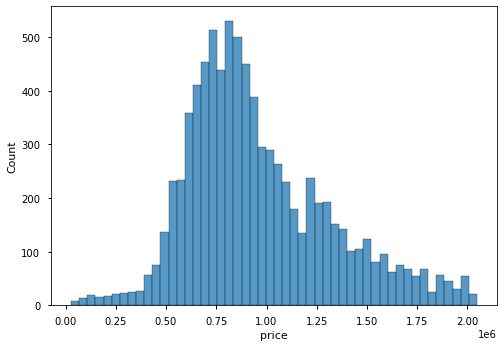

In [33]:
sns.histplot(df['price'], bins=50)

Finding the IQR for Bedrooms, ruling out outliers by multiplying IQR by 1.5

In [34]:
iqrsqft_lot = np.percentile(df['sqft_lot'], 75) -np.percentile(df['sqft_lot'], 25) ##calculating the upper and lower limits for outliers using iqr1.5
lower_lim_sqft_lot =np.percentile(df['sqft_lot'], 25) - 1.5*iqrsqft_lot
upper_lim_sqft_lot =np.percentile(df['sqft_lot'], 75) + 1.5*iqrsqft_lot
print(f'anything above {upper_lim_sqft_lot} and below {lower_lim_sqft_lot} is an outlier')

anything above 11634.25 and below -2963.75 is an outlier


In [35]:
df = df[df['sqft_lot'] <= upper_lim_sqft_lot]

In [36]:
df = df[df['yr_built'] >= 2013]

In [37]:
df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)

Rewrote Heat source column -- items that contained Solar are now just Solar (previously Solar/Electricity or Solar/Gas). Ran a test model on the categorical variables and none were significant. 

In [38]:
##Getting solar homes into their own category. Now all heat sources are singular values.
source = []
df.reset_index(inplace=True)
for heat in df['heat_source']:
    if heat == 'Electricity/Solar' or heat == 'Gas/Solar':
        source.append('Solar')
    else:
        source.append(heat)
    source_df = pd.DataFrame(source)
    df['heat_source'] = source_df

In [39]:
df.drop(['level_0', 'index'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_basement,sqft_garage,sqft_patio,yr_built,ppsq_living,ppsq_lot,zipcode,basement,patio,garage
0,739950.0,2,2.0,1000,1414,3.0,0,0,0,NONE,...,0,0,220,2021,739.95,523.30,98103,0,1,0
1,730000.0,3,2.0,1570,1184,3.0,0,0,0,NONE,...,340,250,30,2021,464.97,616.55,98133,1,1,1
2,687388.0,3,3.5,1720,1674,2.0,0,0,0,NONE,...,700,390,120,2021,399.64,410.63,98106,1,1,1
3,830000.0,3,2.0,1350,667,3.0,0,0,1,NONE,...,380,0,520,2019,614.81,1244.38,98117,1,1,0
4,945000.0,4,2.5,1850,3076,2.5,0,0,0,NONE,...,0,0,0,2013,510.81,307.22,98108,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1298000.0,3,2.5,2230,4249,2.0,0,0,0,NONE,...,0,440,0,2015,582.06,305.48,98133,0,0,1
1339,820000.0,3,2.0,1600,1489,2.0,0,0,1,NONE,...,500,0,550,2016,512.50,550.71,98122,1,1,0
1340,985000.0,3,2.0,1450,888,3.0,0,0,0,NONE,...,0,0,410,2021,679.31,1109.23,98107,0,1,0
1341,345629.0,3,3.5,1430,1078,2.0,0,0,1,NONE,...,330,0,230,2018,241.70,320.62,98107,1,1,0


In [40]:
dummy_heat = pd.get_dummies(df['heat_source'])

In [41]:
df_w_heat = pd.concat([df, dummy_heat], axis=1)

In [42]:
df_w_heat.drop(['level_0', 'index'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_garage,sqft_patio,yr_built,ppsq_living,ppsq_lot,zipcode,basement,patio,garage,Electricity
0,739950.0,2,2.0,1000,1414,3.0,0,0,0,NONE,...,0,220,2021,739.95,523.30,98103,0,1,0,1
1,730000.0,3,2.0,1570,1184,3.0,0,0,0,NONE,...,250,30,2021,464.97,616.55,98133,1,1,1,0
2,687388.0,3,3.5,1720,1674,2.0,0,0,0,NONE,...,390,120,2021,399.64,410.63,98106,1,1,1,0
3,830000.0,3,2.0,1350,667,3.0,0,0,1,NONE,...,0,520,2019,614.81,1244.38,98117,1,1,0,0
4,945000.0,4,2.5,1850,3076,2.5,0,0,0,NONE,...,0,0,2013,510.81,307.22,98108,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1298000.0,3,2.5,2230,4249,2.0,0,0,0,NONE,...,440,0,2015,582.06,305.48,98133,0,0,1,0
1339,820000.0,3,2.0,1600,1489,2.0,0,0,1,NONE,...,0,550,2016,512.50,550.71,98122,1,1,0,0
1340,985000.0,3,2.0,1450,888,3.0,0,0,0,NONE,...,0,410,2021,679.31,1109.23,98107,0,1,0,0
1341,345629.0,3,3.5,1430,1078,2.0,0,0,1,NONE,...,0,230,2018,241.70,320.62,98107,1,1,0,0


In [43]:
# Making sure waterfronts were statistically insignificant.

df['waterfront'].value_counts()

0    1343
Name: waterfront, dtype: int64

In [ ]:
# 0 is definitely low.

Creating a visualization of price per square living in Seattle Proper's Zipcodes.

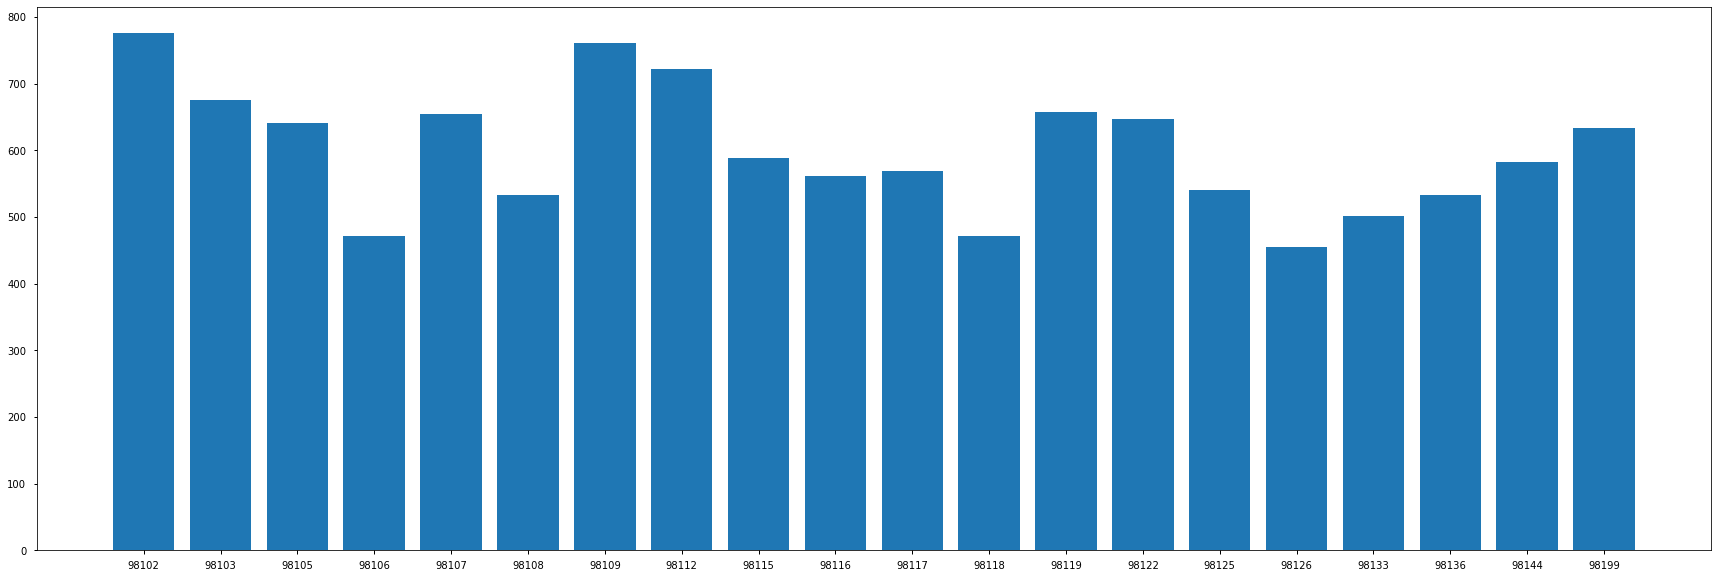

In [44]:
fig, ax = plt.subplots(figsize=(30, 10))
plt.bar([str(x) for x in df.groupby('zipcode').mean()['ppsq_living'].index],
         df.groupby('zipcode').mean()['ppsq_living'].values)

#plt.hist(df['ppsq_living'], bins=100)
#df.groupby('zipcode').mean()['ppsq_living'].index
plt.show()

## Initial Analysis for building models

In [102]:
# Printing correlations by price.
df.corr()['price'].sort_values(ascending=False)

price            1.000000e+00
sqft_living      7.010655e-01
sqft_above       6.432142e-01
sqft_lot         5.507728e-01
bedrooms         4.803580e-01
bathrooms        4.547923e-01
sqft_garage      3.977824e-01
ppsq_living      3.533216e-01
sqft_basement    3.324832e-01
garage           2.971223e-01
sqft_patio       2.507575e-01
basement         1.250272e-01
patio            4.236661e-02
greenbelt        2.200562e-03
avg_price        6.342866e-16
index           -4.393450e-02
level_0         -4.393991e-02
zipcode         -4.716563e-02
nuisance        -9.201538e-02
ppsq_lot        -1.397503e-01
floors          -1.915497e-01
yr_built        -2.529997e-01
waterfront                NaN
Name: price, dtype: float64

<AxesSubplot:>

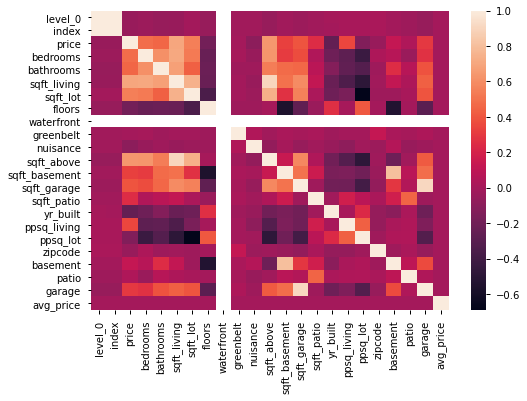

In [90]:
#Creating a heatmap to show correlations.

sns.heatmap(df.corr())

## Dummy Regressor

The baseline model is comparing the mean sale price to the actual sale price.

In [48]:
df['avg_price'] = df['price'].mean()
X = df['avg_price']
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X)).fit()
dummy_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 16 Feb 2023   Prob (F-statistic):                nan
Time:                        12:32:30   Log-Likelihood:                -18926.
No. Observations:                1343   AIC:                         3.785e+04
Df Residuals:                    1342   BIC:                         3.786e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_price      1.0000      0.010    103.802      0.000       0.981       1.019
==============================================================================
Omnibus:                      274.356   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.771
Skew:                           1.273   Prob(JB):                    5.41e-106
Kurtosis:                       4.476   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets see if we can beat it.

## Simple Linear Regression Model

Our simple linear regression models sqft_above with price. "Square feet above" was chosen because "square feet living" is not informative to the stakeholder. 

In [49]:
x = df['sqft_above']
y = df['price']
simple_reg = sm.OLS(y, sm.add_constant(x)).fit()
simple_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     946.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          1.10e-157
Time:                        12:32:30   Log-Likelihood:                -18567.
No. Observations:                1343   AIC:                         3.714e+04
Df Residuals:                    1341   BIC:                         3.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.707e+05   1.86e+04     19.944      0.000    3.34e+05    4.07e+05
sqft_above   384.4946     12.499     30.762      0.000     359.975     409.014
==============================================================================
Omnibus:                       93.324   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.847
Skew:                           0.406   Prob(JB):                     1.11e-48
Kurtosis:                       4.813   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
simple_preds = simple_reg.predict()
simple_resids = df['price'] - simple_preds

In [51]:
x.corr(simple_resids)

8.95431220681299e-16

<AxesSubplot:xlabel='price', ylabel='Count'>

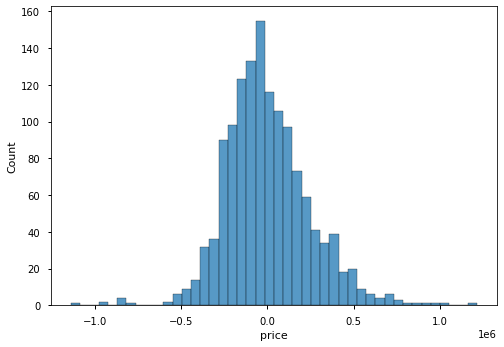

In [52]:
sns.histplot(simple_resids)

C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


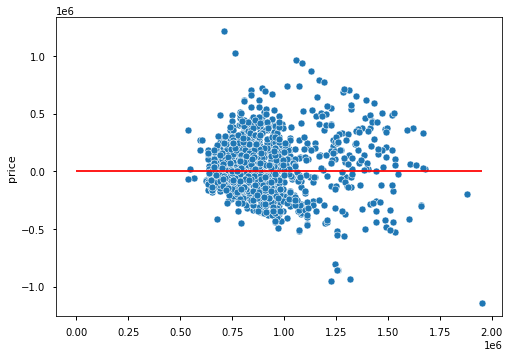

In [53]:
sns.scatterplot( simple_preds, simple_resids)
plt.hlines(0, 0, max(simple_preds), colors='r')
plt.show()

### Interpretation

For every square foot added, price increases by $428.96.
The variable is significant as its below the P value, given the threshold of the significance level is 95%.
The Square feet above ground explains about 45% of the variability in price.

## First Multiple Linear Regression Model

Standard scale all X variables. This does not include categorical variables, such as "heat source" and "grade".

In [54]:
scaled = StandardScaler().fit_transform(df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1))
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1).columns

In [55]:

x = scaled_df.drop(['price', 'zipcode', 'ppsq_living', 'ppsq_lot', 'avg_price'], axis=1)
y = scaled_df['price']

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          3.51e-219
Time:                        12:32:31   Log-Likelihood:                -1362.9
No. Observations:                1343   AIC:                             2760.
Df Residuals:                    1326   BIC:                             2848.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.204e-18      0.018   2.84e-16      1.000      -0.036       0.036
level_0          -0.0139      0.018     -0.752      0.452      -0.050       0.022
bedrooms         -0.0464      0.028     -1.671      0.095      -0.101       0.008
bathrooms         0.0090      0.027      0.331      0.741      -0.044       0.062
sqft_living       0.4006      0.124      3.225      0.001       0.157       0.644
sqft_lot          0.0853      0.034      2.531      0.011       0.019       0.151
floors           -0.0178      0.028     -0.644      0.520      -0.072       0.036
waterfront    -9.342e-17   1.84e-16     -0.508      0.612   -4.54e-16    2.68e-16
greenbelt         0.0031      0.018      0.168      0.866      -0.033       0.039
nuisance         -0.0762      0.019     -4.108      0.000      -0.113      -0.040
sqft_above        0.3286      0.118      2.789      0.005       0.097       0.560
sqft_basement    -0.1028      0.062     -1.648      0.100      -0.225       0.020
sqft_garage      -0.1067      0.060     -1.780      0.075      -0.224       0.011
sqft_patio        0.1908      0.021      8.914      0.000       0.149       0.233
yr_built         -0.0969      0.020     -4.918      0.000      -0.136      -0.058
basement          0.2186      0.040      5.487      0.000       0.140       0.297
patio            -0.0665      0.021     -3.164      0.002      -0.108      -0.025
garage            0.0069      0.050      0.137      0.891      -0.091       0.105
==============================================================================
Omnibus:                      195.324   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1880.672
Skew:                          -0.327   Prob(JB):                         0.00
Kurtosis:                       8.760   Cond. No.                     2.90e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
preds_1 = model.predict()
resids_1 = scaled_df['price'] - preds_1

In [57]:
x.corrwith(resids_1)

level_0         -3.378254e-16
bedrooms         2.357843e-16
bathrooms        1.644546e-16
sqft_living      2.377657e-17
sqft_lot        -8.420868e-17
floors           6.290884e-17
waterfront                NaN
greenbelt       -2.393136e-16
nuisance         3.467416e-17
sqft_above       2.080450e-17
sqft_basement   -8.916213e-18
sqft_garage     -1.832777e-17
sqft_patio      -1.416687e-16
yr_built        -4.180713e-16
basement        -8.123661e-17
patio           -2.437098e-16
garage           4.458107e-18
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

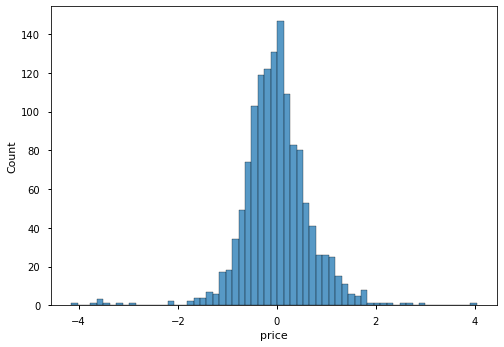

In [58]:
sns.histplot(resids_1)

C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


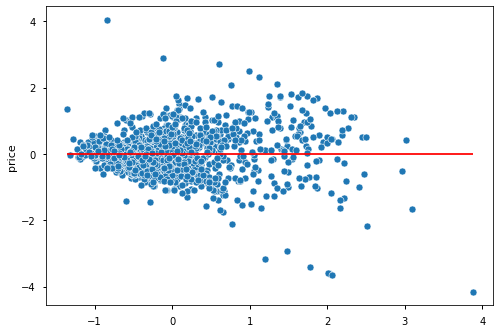

In [59]:
sns.scatterplot( preds_1, resids_1)
plt.hlines(0, min(preds_1), max(preds_1), colors='r')
plt.show()

<AxesSubplot:title={'center':'Predicted Compared to\nActual Values'}, xlabel='Predicted Standardized Price', ylabel='Actual Standardized Price'>

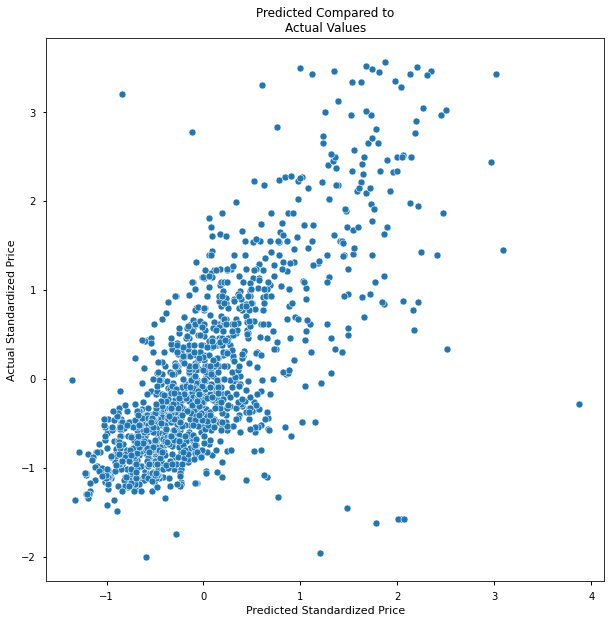

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Predicted Compared to\nActual Values')
ax.set_ylabel('Actual Standardized Price')
ax.set_xlabel('Predicted Standardized Price')
sns.scatterplot(x=preds_1, y=y)


In [61]:
[str(z).title() for z in x.columns]

['Level_0',
 'Bedrooms',
 'Bathrooms',
 'Sqft_Living',
 'Sqft_Lot',
 'Floors',
 'Waterfront',
 'Greenbelt',
 'Nuisance',
 'Sqft_Above',
 'Sqft_Basement',
 'Sqft_Garage',
 'Sqft_Patio',
 'Yr_Built',
 'Basement',
 'Patio',
 'Garage']

### Interpretation

Variables that are statistically significant (where P value is less than .05):
- Bathrooms
- Greenbelt
- Nuisance
- Square feet above ground
- Square feet basement
- Square feet garage
- Square feet patio
- Year built
- Presence of basement
- Presence of patio
- Presence of garage

However, some variables were found to be not significant, we will chose to include them as they are important to the stakeholder. 

In [62]:
print("The mean squared error of price is ", model.mse_total, " standard deviations.")

The mean squared error of price is  1.0007451564828613  standard deviations.


In [63]:
df['price'].std()

319251.1858317692

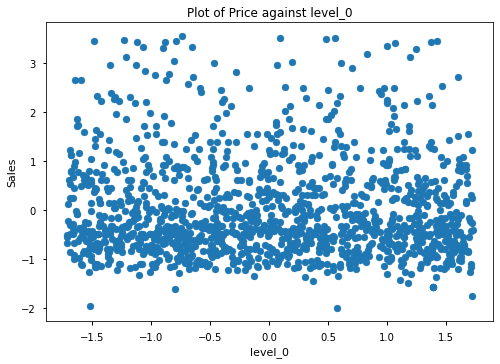

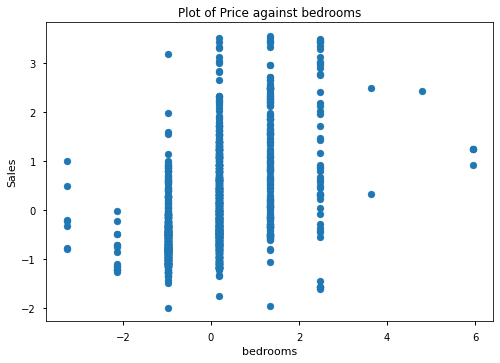

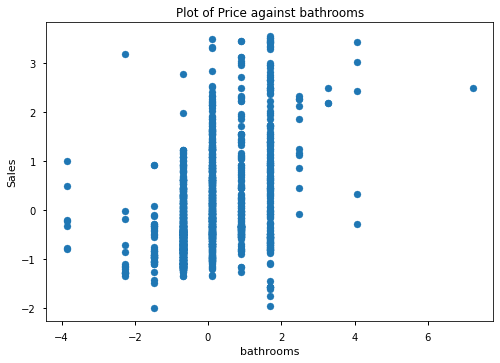

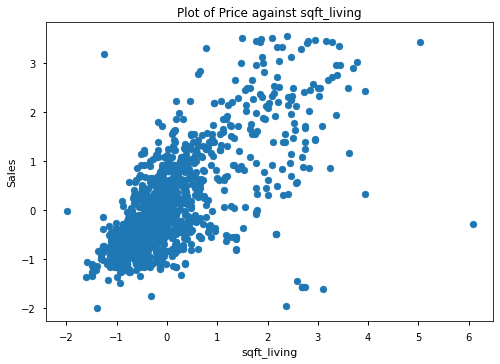

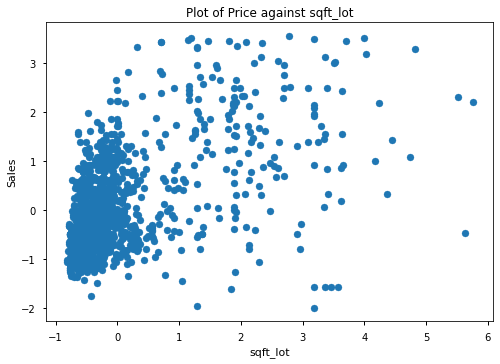

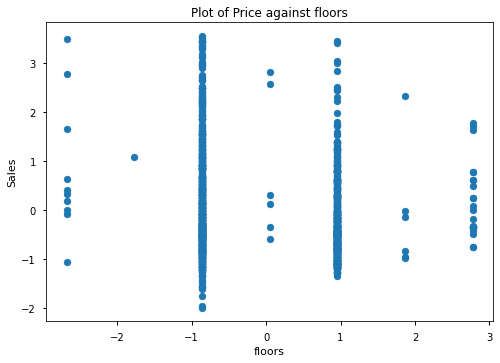

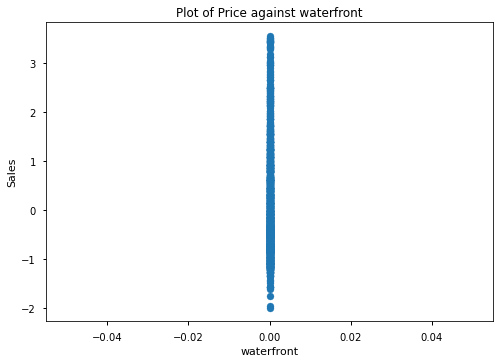

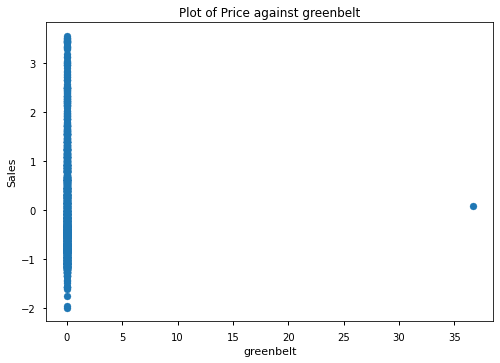

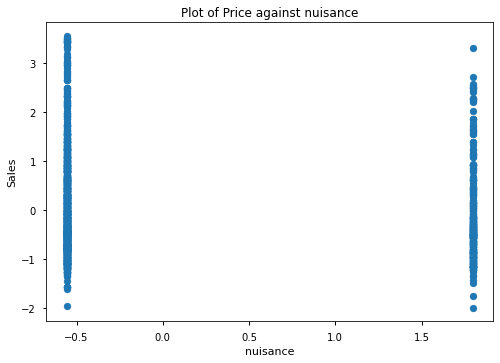

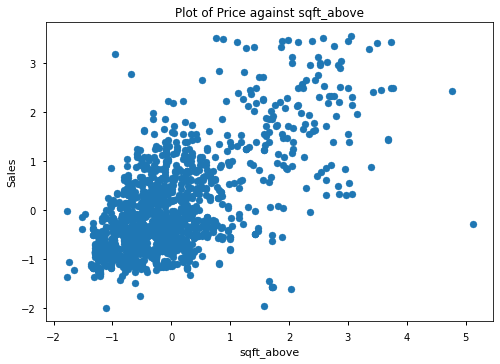

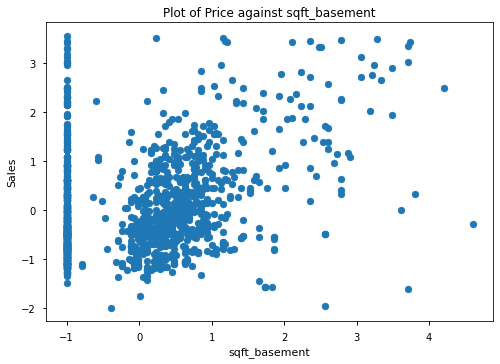

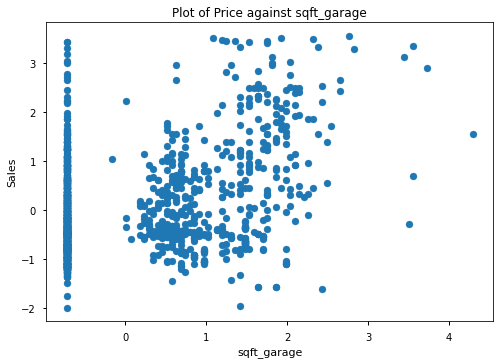

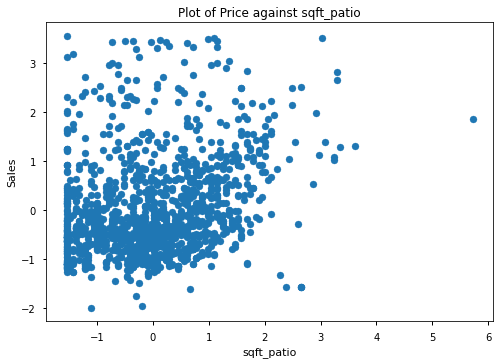

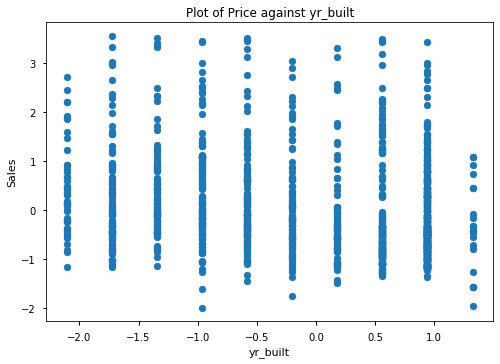

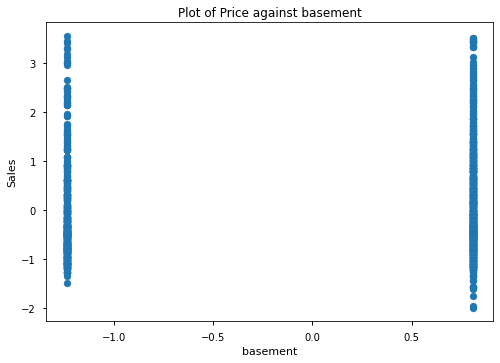

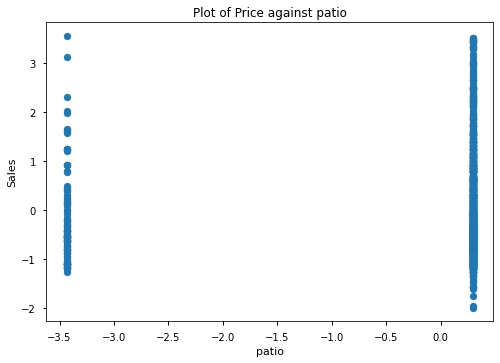

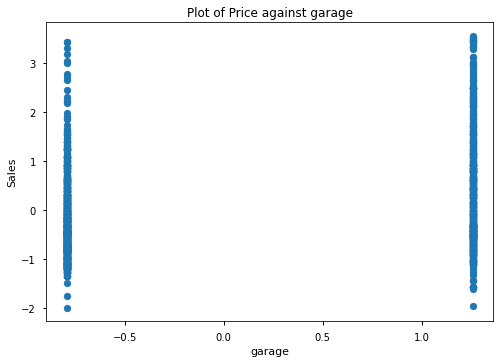

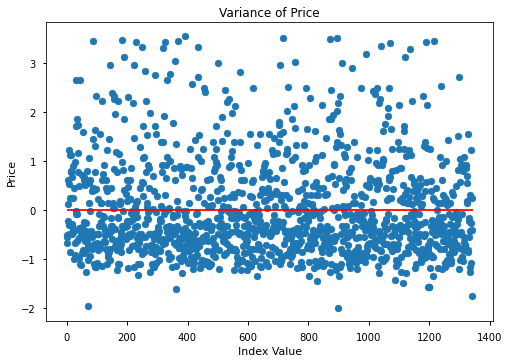

In [64]:
df_interest = scaled_df.drop(['price', 'zipcode', 'ppsq_living', 'ppsq_lot', 'avg_price'], axis=1)
features = df_interest.columns

for x in features:
    plt.scatter(df_interest[x], scaled_df['price'])
    plt.title(f'Plot of Price against {x}')
    plt.xlabel(x)
    plt.ylabel('Sales')
    plt.show()

# also plot sales against itself
plt.scatter(scaled_df.index, scaled_df['price'])
plt.hlines(scaled_df['price'].mean(), 0, len(scaled_df), colors='r')
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

### Second Multiple Linear Regression Model

In [65]:
x2 = scaled_df[['bedrooms', 'sqft_above', 'basement', 'sqft_garage', 'sqft_patio', 'nuisance', 'sqft_lot']]
y2 = scaled_df['price']

model = sm.OLS(y2, sm.add_constant(x2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     220.8
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          8.01e-218
Time:                        12:32:33   Log-Likelihood:                -1389.2
No. Observations:                1343   AIC:                             2794.
Df Residuals:                    1335   BIC:                             2836.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.204e-18      0.019   2.79e-16      1.000      -0.037       0.037
bedrooms        0.0016      0.026      0.061      0.951      -0.048       0.052
sqft_above      0.6956      0.038     18.273      0.000       0.621       0.770
basement        0.2980      0.025     12.158      0.000       0.250       0.346
sqft_garage    -0.1659      0.028     -5.903      0.000      -0.221      -0.111
sqft_patio      0.1617      0.019      8.351      0.000       0.124       0.200
nuisance       -0.0665      0.019     -3.552      0.000      -0.103      -0.030
sqft_lot        0.1280      0.029      4.450      0.000       0.072       0.184
==============================================================================
Omnibus:                      178.676   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.923
Skew:                          -0.302   Prob(JB):                         0.00
Kurtosis:                       8.166   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model.mse_total

1.0007451564828613

In [67]:
preds_2 = model.predict()
resids_2 = scaled_df['price'] - preds_2

In [68]:
x2.corrwith(resids_2)

bedrooms      -3.303069e-17
sqft_above    -5.828946e-17
basement       4.264846e-16
sqft_garage    2.695888e-16
sqft_patio    -1.000636e-16
nuisance       4.566008e-17
sqft_lot       2.015844e-17
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

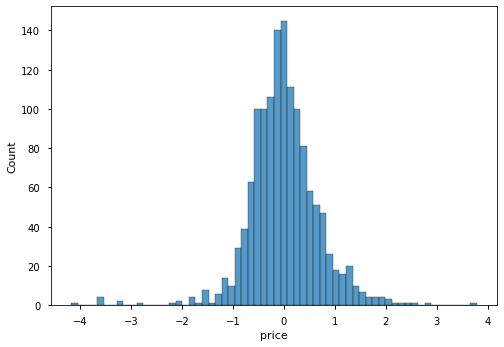

In [69]:
sns.histplot(resids_2)

C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


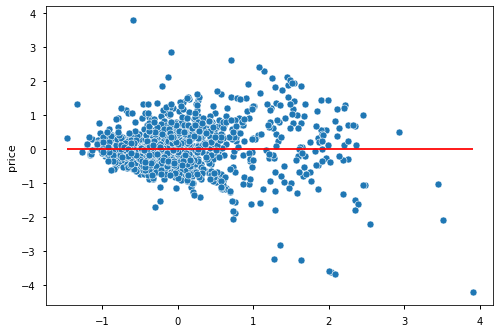

In [70]:
sns.scatterplot( preds_2, resids_2)
plt.hlines(0, min(preds_2), max(preds_2), colors='r')
plt.show()

### Interpretation

All variables besides increasing numbers bedrooms are significant. The Adjusted R-squared decreased 1%. Square foot of the lot, square foot above ground, and presence of a basement seem to have the biggest effect on price. 

## Third Model

In [71]:
scaled = StandardScaler().fit_transform(df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1))
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = df.drop(['view', 'grade', 'heat_source', 'sewer_system', 'index'], axis=1).columns

In [72]:
## Dropped bedrooms, adjusted R2 went up .1 percent
x3 = scaled_df[['sqft_above', 'basement','sqft_garage', 'sqft_patio', 'nuisance', 'sqft_lot']]
y3 = scaled_df['price']

model = sm.OLS(y3, sm.add_constant(x3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     257.8
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          4.79e-219
Time:                        12:32:33   Log-Likelihood:                -1389.2
No. Observations:                1343   AIC:                             2792.
Df Residuals:                    1336   BIC:                             2829.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.204e-18      0.019   2.79e-16      1.000      -0.037       0.037
sqft_above      0.6967      0.033     21.077      0.000       0.632       0.762
basement        0.2984      0.023     12.825      0.000       0.253       0.344
sqft_garage    -0.1662      0.028     -6.026      0.000      -0.220      -0.112
sqft_patio      0.1616      0.019      8.363      0.000       0.124       0.200
nuisance       -0.0665      0.019     -3.556      0.000      -0.103      -0.030
sqft_lot        0.1282      0.029      4.476      0.000       0.072       0.184
==============================================================================
Omnibus:                      178.467   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.977
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                       8.163   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model.mse_total

1.0007451564828613

In [74]:
preds_3 = model.predict()
resids_3 = scaled_df['price'] - preds_3

In [75]:
x3.corrwith(resids_3)

sqft_above     4.692295e-16
basement      -4.041397e-16
sqft_garage    1.340656e-16
sqft_patio     2.982473e-16
nuisance      -4.954597e-17
sqft_lot       8.014790e-17
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

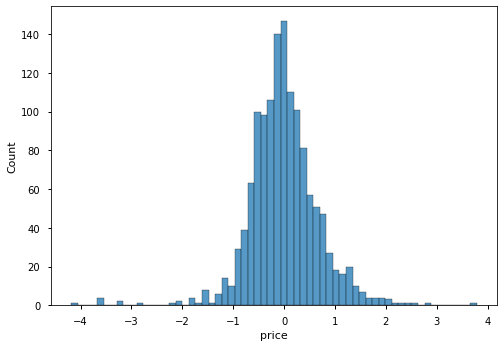

In [76]:
sns.histplot(resids_3)

C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


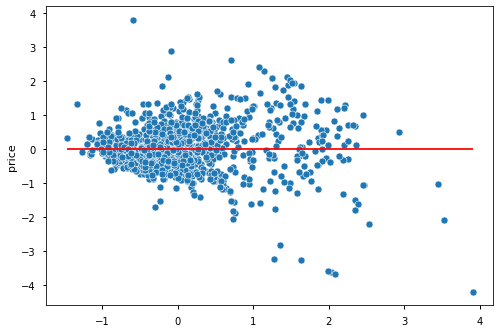

In [77]:
sns.scatterplot( preds_3, resids_3)
plt.hlines(0, min(preds_3), max(preds_3), colors='r')
plt.show()

<AxesSubplot:>

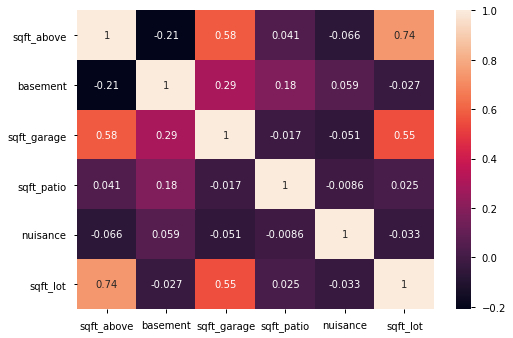

In [91]:
# Creating another heatmap for correlation
sns.heatmap(x3.corr(), annot=True)

Square foot above and square foot lot are multicollinear (.74 is greater than .7).

## Final Model

We dropped square foot lot due to its multicollinearity with square foot above.

In [79]:
x4 = scaled_df[['sqft_above', 'basement','sqft_garage', 'sqft_patio', 'nuisance']]
y4 = scaled_df['price']

model = sm.OLS(y4, sm.add_constant(x4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     301.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          5.33e-216
Time:                        12:32:34   Log-Likelihood:                -1399.2
No. Observations:                1343   AIC:                             2810.
Df Residuals:                    1337   BIC:                             2842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.204e-18      0.019   2.77e-16      1.000      -0.037       0.037
sqft_above      0.7839      0.027     29.147      0.000       0.731       0.837
basement        0.3085      0.023     13.229      0.000       0.263       0.354
sqft_garage    -0.1488      0.028     -5.411      0.000      -0.203      -0.095
sqft_patio      0.1597      0.019      8.207      0.000       0.122       0.198
nuisance       -0.0647      0.019     -3.434      0.001      -0.102      -0.028
==============================================================================
Omnibus:                      164.342   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1592.794
Skew:                          -0.083   Prob(JB):                         0.00
Kurtosis:                       8.333   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Printing our MSE for the Final Model.
model.mse_total

1.0007451564828613

In [81]:
preds_4 = model.predict()
resids_4 = scaled_df['price'] - preds_4

In [82]:
#Printing our Residuals
x4.corrwith(resids_4)

sqft_above     1.574678e-15
basement       3.268927e-16
sqft_garage    1.011535e-15
sqft_patio     2.738570e-16
nuisance      -2.063570e-16
dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

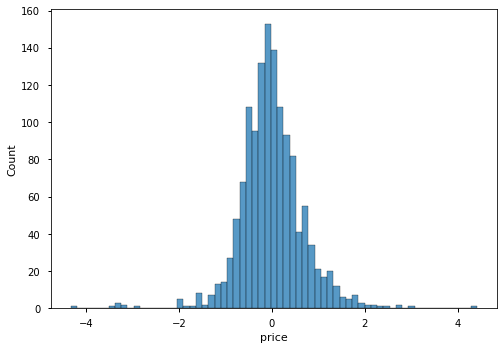

In [101]:
#Plotting them
sns.histplot(resids_4)


C:\Users\Jake\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


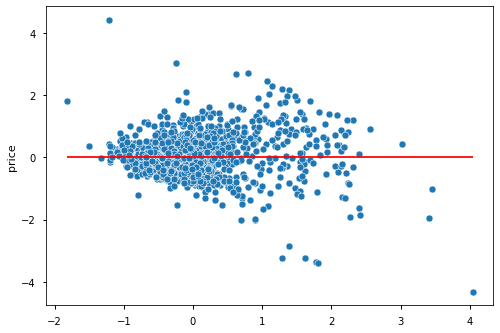

In [84]:
sns.scatterplot( preds_4, resids_4)
plt.hlines(0, min(preds_4), max(preds_4), colors='r')
plt.show()

<AxesSubplot:title={'center':'Predicted Compared to\nActual Values'}, xlabel='Predicted Standardized Price', ylabel='Actual Standardized Price'>

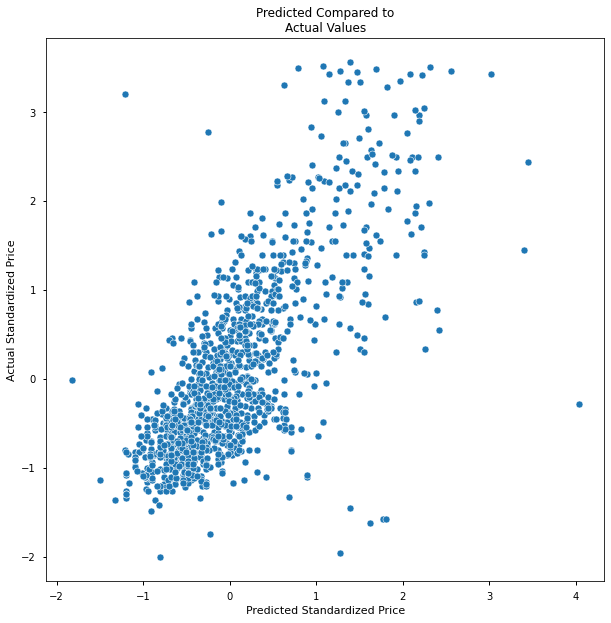

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Predicted Compared to\nActual Values')
ax.set_ylabel('Actual Standardized Price')
ax.set_xlabel('Predicted Standardized Price')
sns.scatterplot(x=preds_4, y=y4)

<AxesSubplot:title={'center':'Change in Price if Present'}, xlabel='Parameter', ylabel='Price Change ($)'>

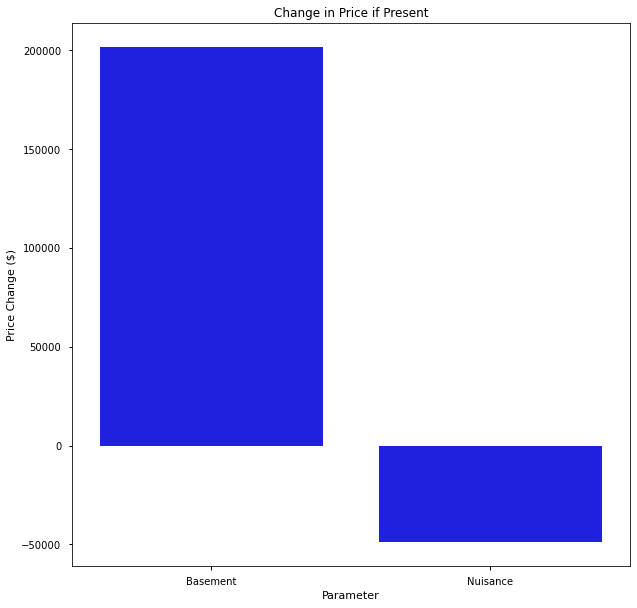

In [99]:
#Creating a visualization of two negative and positive presences on price.
dollarvalues = [(df['price'].std()*.7839/df['sqft_above'].std()),
    -abs((df['price'].std()*.1488)/df['sqft_garage'].std()),
   ((df['price'].std()*.1597)/df['sqft_patio'].std()),]
dollarnames = [str(z).lower() for z in x4.columns]
dollarnames.pop(1)
dollarnames.pop(-1)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Change in Price if Present')
ax.set_ylabel('Price Change ($)')
ax.set_xlabel('Parameter')

values = [((df['price'].std()*.3085) / df['basement'].std()),-abs((df['price'].std()*.0647) / df['nuisance'].std())]
names = ['Basement', 'Nuisance']
sns.barplot(x=names, y=values, color= 'b')

### Intepretation

In [93]:
#Summing up our findings and printing them out.

print('For every {} sqft increased above ground, price increases by ${}'
      .format(round(df['sqft_above'].std(),2), round((df['price'].std()*.7839),2)))

print('For every basement added, price increases by ${}'
      .format(round((df['price'].std()*.3085) / df['basement'].std(),2)))

print('For every {} sqft increased in a garage, price decreases by ${}'
      .format(round(df['sqft_garage'].std(),2), round((df['price'].std()*.1488),2)))

print('For every {} sqft increased on a patio, price increases by ${}'
      .format(round(df['sqft_patio'].std(),2), round((df['price'].std()*.1597),2)))

print('For every nuisance present, price decreases by ${}'
      .format(round((df['price'].std()*.0647) / df['nuisance'].std(),2)))

print('On average, the predicted value varies +- ${}'
      .format(round(model.mse_total * df['price'].std(),2)))

For every 534.07 sqft increased above ground, price increases by $250261.0
For every basement added, price increases by $201427.49
For every 177.54 sqft increased in a garage, price decreases by $47504.58
For every 185.99 sqft increased on a patio, price increases by $50984.41
For every nuisance present, price decreases by $48570.84
On average, the predicted value varies +- $319489.08


# Conclusions

As per our final model, we've found that higher square foot living, and the presence of a basement or patio to be the factors most interesting/statistically relevant to our share holders. We also found that the presence of either a garage or a nuisance factor can negatively affect price, so is certainly something to be considered during property acquisition.